C:\Anaconda\lib\site-packages\ipykernel_launcher.py:74: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


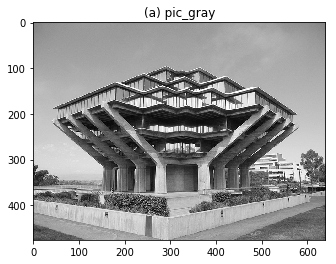

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:81: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


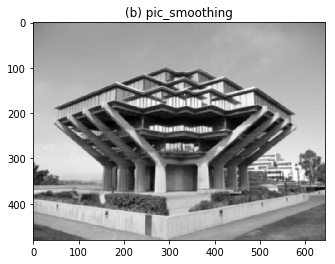

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


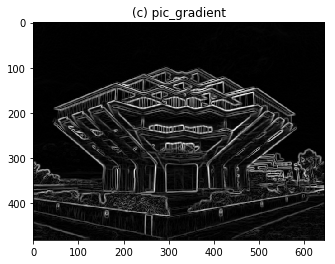

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:90: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


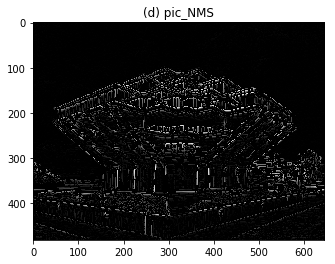

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:96: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


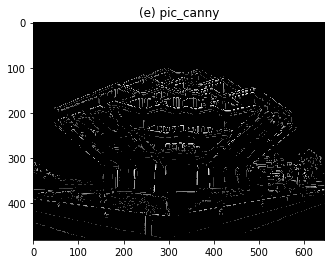

In [17]:
import numpy as np
from scipy.misc import *
import matplotlib.pyplot as plt
import math
from scipy import signal

def rgb2gray(rgb):
    grayimg=np.sum(rgb,axis=2)/3
    return grayimg

#question(1):
def smoothing(img):
    kernel=np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])*(1/159)
    smoothed_img=signal.convolve2d(img, kernel, boundary="symm")
    return smoothed_img

#question(2):
def Gradients(img):
    kx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    ky=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    (n1,n2)=img.shape
    Gx=signal.convolve2d(img, kx, boundary="symm")
    Gy=signal.convolve2d(img, ky, boundary="symm")
    G=np.sqrt(np.power(Gx,2)+np.power(Gy,2))
    return G/G.max()*255


def Gradients_theta(img):
    kx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    ky=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    (n1,n2)=img.shape
    Gx=signal.convolve2d(img, kx, boundary="symm")
    Gy=signal.convolve2d(img, ky, boundary="symm")
    G_theta=np.arctan2(Gy,Gx)
    return G_theta

#question(3):
def NMS(img):
    (n1,n2)=img.shape
    remainder=Gradients_theta(img)%(math.pi/2)
    for i in range (0,n1):
        for j in range (0,n2):
            if 0<remainder[i,j] and remainder[i,j]<=math.pi/8:
                remainder[i,j]=math.pi/4
            if math.pi/8<remainder[i,j] and remainder[i,j]<=math.pi*3/8:
                remainder[i,j]=math.pi/4
            if math.pi*3/8<remainder[i,j] and remainder[i,j]<=math.pi/2:
                remainder[i,j]=math.pi/2
    theta=(math.pi/2)*(Gradients_theta(img)//(math.pi/2))+remainder
    for i in range (1,n1-1):
        for j in range (1,n2-1):
            if theta[i,j]%(math.pi)==0:
                if img[i,j]<img[i,j-1] or img[i,j]<img[i,j+1]:
                    img[i,j]=0
            elif theta[i,j]%(math.pi)==math.pi/2:
                if img[i,j]<img[i-1,j] or img[i,j]<img[i+1,j]:
                    img[i,j]=0
            elif theta[i,j]%(math.pi)==math.pi/4:
                if img[i,j]<img[i+1,j-1] or img[i,j]<img[i-1,j+1]:
                    img[i,j]=0
            elif theta[i,j]%(math.pi)==math.pi*3/4:
                if img[i,j]<img[i-1,j-1] or img[i,j]<img[i+1,j+1]:
                    img[i,j]=0
    return img
    
#question(4)
def canny_edge(img, te):
    #img[img>=te]=255
    img[img < te] = 0
    return img

    

pic_color=imread('geisel.jpg')
pic_gray=rgb2gray(pic_color)
plt.imshow(pic_gray,cmap='gray')
plt.title('(a) pic_gray')
plt.show()
pic_smoothing=smoothing(pic_gray)
plt.imshow(pic_smoothing,cmap='gray')
imsave('pic_smoothing.png',pic_smoothing)
plt.title('(b) pic_smoothing')
plt.show()
pic_gradient=Gradients(pic_smoothing)
plt.imshow(pic_gradient,cmap='gray')
imsave('pic_gradient.png',pic_gradient)
plt.title('(c) pic_gradient')
plt.show()
pic_NMS=NMS(pic_gradient)
imsave('pic_NMS.png',pic_NMS)
plt.imshow(pic_NMS,cmap='gray')
plt.title('(d) pic_NMS')
plt.show()
pic_canny=canny_edge(pic_NMS,50)
plt.imshow(pic_canny, cmap='gray')
imsave('pic_canny.png',pic_canny)
plt.title('(e) pic_canny')
plt.show()